# Transformation & Scalling

1. Standardization
2. Scaling to Minimum and Maximum
3. Scaling to Median and Quantiles (Robust scaling)
4. Gaussian Transformation
* Logarithmic transformation
* Reciprocal transformation
* Squar root transformation
* Exponential transformation
* Box Cox transformation

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

#scaling
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

#transformation

import scipy.stats as stats
import pylab

In [57]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Scaling

### Standardization

It was tried to bring all the variables/features to a similar scale. Standardization means centering the variable at zero. 

`z=(x - x_mean)/std`

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv', usecols=['Pclass', 'Age', 'Fare', 'Survived'])

In [19]:
df01 = data.copy()
df01.tail()

,Survived,Pclass,Age,Fare
886,0,2,27.0,13.00
887,1,1,19.0,30.00
888,0,3,NaN,23.45
889,1,1,26.0,30.00
890,0,3,32.0,7.75


In [20]:
df01.isna().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [21]:
# It is required to fill the NAN values in the age - In this case, we applied the constant technique to fill NAN
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
df01['Age'] = imp_median.fit_transform(df01[['Age']])

In [22]:
df01.isna().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [23]:
df01.tail()

,Survived,Pclass,Age,Fare
886,0,2,27.0,13.00
887,1,1,19.0,30.00
888,0,3,28.0,23.45
889,1,1,26.0,30.00
890,0,3,32.0,7.75


In [26]:
scaler = StandardScaler()

# Fir vs fit_transform: Apply the algorithm, fit would be used and to appyl algorithm and to apply it to the data, fit_transform is used
df01_scale = scaler.fit_transform(df01)

In [58]:
df01_scale = pd.DataFrame(df01_scale,columns=df01.columns)
df01_scale.describe()

,Survived,Pclass,Age,Fare
count,891.00000,891.00000,891.00000,891.00000
mean,0.00000,-0.00000,0.00000,0.00000
std,1.00056,1.00056,1.00056,1.00056
min,-0.78927,-1.56611,-2.22416,-0.64842
25%,-0.78927,-0.36936,-0.56574,-0.48915
50%,-0.78927,0.82738,-0.10464,-0.35739
75%,1.26699,0.82738,0.43331,-0.02425
max,1.26699,0.82738,3.89155,9.66717


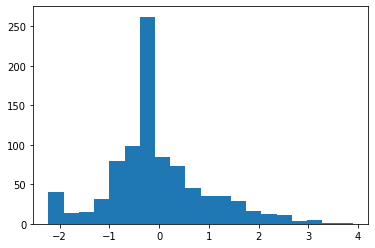

In [46]:
plt.hist(df01_scale['Age'],bins=20)
plt.show()

### Min-Max Scaling

Min-Max scaling sclaes the values between 0 an 1.

`X_scaled = (X - X.min/(X.max - X.min))`

In [67]:
df02 = df01.copy()
df02.tail()

,Survived,Pclass,Age,Fare
886,0,2,27.00000,13.00000
887,1,1,19.00000,30.00000
888,0,3,28.00000,23.45000
889,1,1,26.00000,30.00000
890,0,3,32.00000,7.75000


In [68]:
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df02),columns=df02.columns)
df_minmax.describe()

,Survived,Pclass,Age,Fare
count,891.00000,891.00000,891.00000,891.00000
mean,0.38384,0.65432,0.36368,0.06286
std,0.48659,0.41804,0.16361,0.09700
min,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.50000,0.27117,0.01544
50%,0.00000,1.00000,0.34657,0.02821
75%,1.00000,1.00000,0.43453,0.06051
max,1.00000,1.00000,1.00000,1.00000


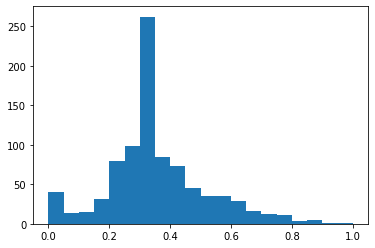

In [71]:
plt.hist(df_minmax['Age'],bins=20)
plt.show()

### Robust scaling
It is used to scale the feature to median and quantiles. When the distribution of the feature is skewed, perhaps it is good to use robust scaling techniques since it is robust
to presense fo outliers.

`IQR = 75th quantile - 25th quantile`

`X_scale = (X - X.median) / IQR`

In [73]:
df03 = df01.copy()
df03.head()

,Survived,Pclass,Age,Fare
0,0,3,22.00000,7.25000
1,1,1,38.00000,71.28330
2,1,3,26.00000,7.92500
3,1,1,35.00000,53.10000
4,0,3,35.00000,8.05000


In [74]:
rob_sacale = RobustScaler()
df_robust = pd.DataFrame(rob_sacale.fit_transform(df03),columns=df03.columns)
df_robust.describe()

,Survived,Pclass,Age,Fare
count,891.00000,891.00000,891.00000,891.00000
mean,0.38384,-0.69136,0.10474,0.76874
std,0.48659,0.83607,1.00152,2.15220
min,0.00000,-2.00000,-2.12154,-0.62600
25%,0.00000,-1.00000,-0.46154,-0.28341
50%,0.00000,0.00000,0.00000,0.00000
75%,1.00000,0.00000,0.53846,0.71659
max,1.00000,0.00000,4.00000,21.56274


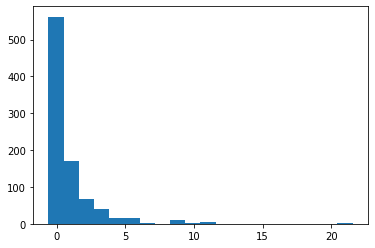

In [75]:
plt.hist(df_robust['Fare'],bins=20)
plt.show()

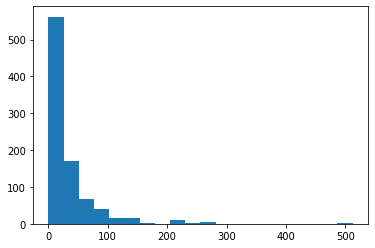

In [76]:
plt.hist(data['Fare'],bins=20)
plt.show()

# Transformation

Some ML algorithm including linear & logistic regression assume that the features are normally distributed, can have better performance

`To check if the feature is Guassian or normal distributed, Q-Q plot can be used`

## Logarithmic transformation

This technique would work well when the data is left/right skewed

Methods to deal with zero values while performing log transformation of variable is to add a constant value (1) to each value of variable then take a log transformation

`log(x+1) which has the neat feature that 0 maps to 0.`

`log(x+c) where c is either estimated or set to be some very small positive value.`

In [79]:
df04 = df01.copy()
df04.head()

,Survived,Pclass,Age,Fare
0,0,3,22.00000,7.25000
1,1,1,38.00000,71.28330
2,1,3,26.00000,7.92500
3,1,1,35.00000,53.10000
4,0,3,35.00000,8.05000


In [94]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(121)
    df[feature].hist()
    plt.subplot(122)
    stats.probplot(df[feature],dist = 'norm',plot=pylab)
    plt.show()

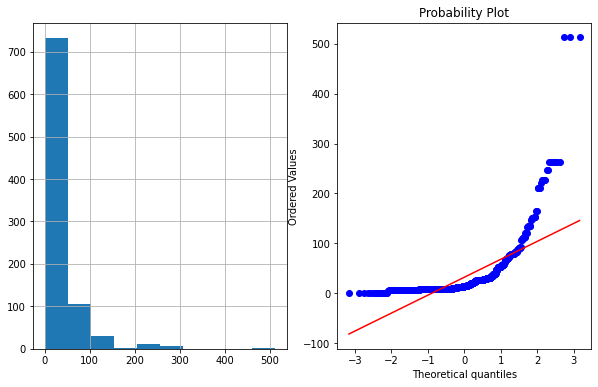

In [100]:
plot_data(df04,'Fare')

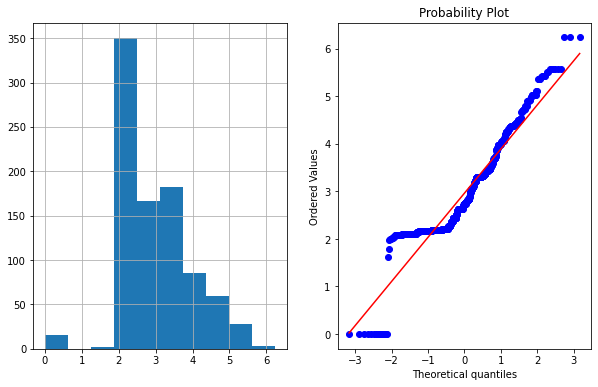

In [137]:
df04['Age_Log'] = np.log1p(df04['Fare'])
plot_data(df04,'Age_Log')

## Reciprocal transformation (Inverse transformation)

It can be used with nonzero data and is commonly used when distributions have skewness or clear outliers

In [110]:
df05 = df01.copy()
df05.head()

,Survived,Pclass,Age,Fare
0,0,3,22.00000,7.25000
1,1,1,38.00000,71.28330
2,1,3,26.00000,7.92500
3,1,1,35.00000,53.10000
4,0,3,35.00000,8.05000


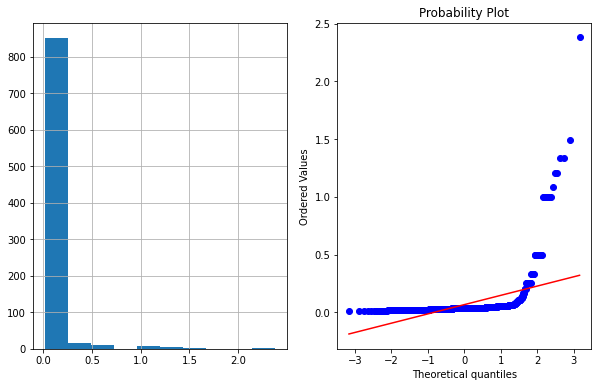

In [117]:
df05['Age_inverse'] = 1/df05.Age
plot_data(df05,'Age_inverse')

## Square root transformation

In [118]:
df06 = df01.copy()
df06.head()

,Survived,Pclass,Age,Fare
0,0,3,22.00000,7.25000
1,1,1,38.00000,71.28330
2,1,3,26.00000,7.92500
3,1,1,35.00000,53.10000
4,0,3,35.00000,8.05000


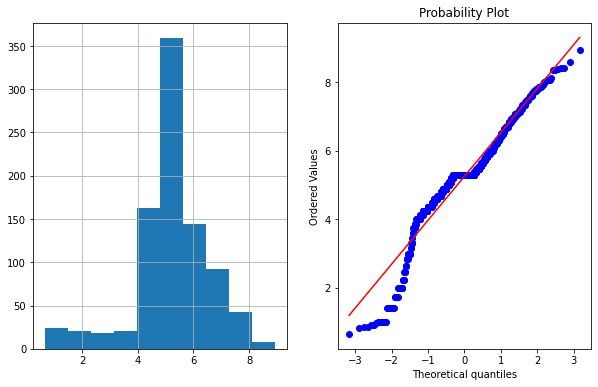

In [119]:
df06['Age_square'] = df06.Age**(1/2)
plot_data(df06,'Age_square')

## Exponential transformation

In [120]:
df07 = df01.copy()
df07.head()

,Survived,Pclass,Age,Fare
0,0,3,22.00000,7.25000
1,1,1,38.00000,71.28330
2,1,3,26.00000,7.92500
3,1,1,35.00000,53.10000
4,0,3,35.00000,8.05000


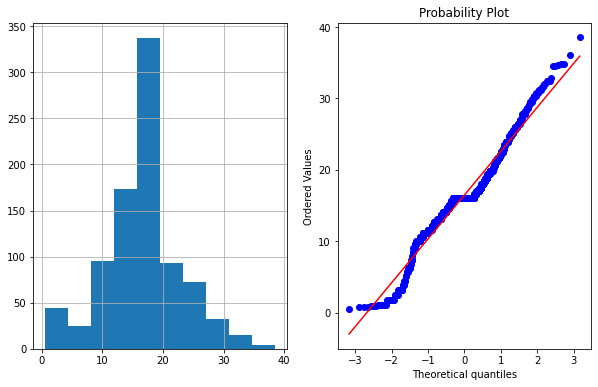

In [136]:
df07['Age_exp'] = np.power(df07.Age,1/1.2)
plot_data(df07,'Age_exp')

## Box Cox transformation

The BOX-Cox transformation is defined as. `boxcox` requires the input data to be positive.  Sometimes a Box-Cox transformation provides a shift parameter to achieve this; `boxcox` does not.  Such a shift parameter is equivalent to adding a positive constant to `x` before calling `boxcox`.

`T(Y) = (Y exp(lam)-1)/lam`

In [126]:
df08 = df01.copy()
df08.head()

,Survived,Pclass,Age,Fare
0,0,3,22.00000,7.25000
1,1,1,38.00000,71.28330
2,1,3,26.00000,7.92500
3,1,1,35.00000,53.10000
4,0,3,35.00000,8.05000


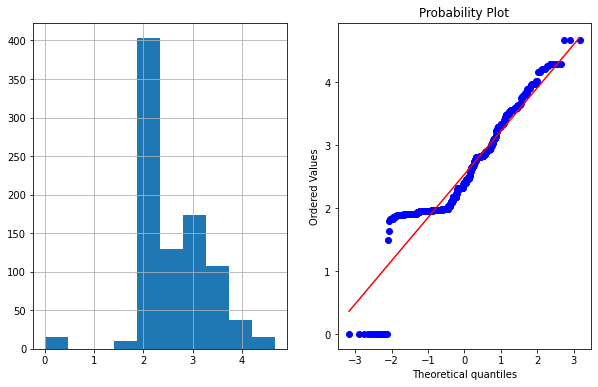

In [143]:
df08['Fare_BoxCox'],parammeters = stats.boxcox(df08['Fare']+1)
plot_data(df08,'Fare_BoxCox')